In [1]:
#libraries needed for this program
import sys
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from pyspark import SparkContext
from os import path
import matplotlib.pyplot as plt

In [2]:
#function to remove charectors from words
def charRemoveFromString(x):
    cleanString = ''.join(filter(str.isalnum, x)) 
    return cleanString

In [3]:
def wordCloud(k,x):		
    # create Spark context with necessary configuration
    sc = SparkContext("local","PySpark Word Count Exmaple")
    stopWords=stopwords.words('english')
    stopWords.append('')
    # read data from text file and split each line into words and removed stop words
    nyt = sc.parallelize(x).flatMap(lambda line: line.split()).map(lambda x: x.strip()).map(lambda x: charRemoveFromString(x)).map(lambda x:x.lower()).filter(lambda x: x not in stopWords)
        
    # count the occrence of each word
    wordCounts = nyt.map(lambda word: (word, 1)).reduceByKey(lambda a,b:a +b).map(lambda a:[a[1],a[0]]).sortByKey(False).take(100)

    wordFrequency=dict()
    for x in wordCounts:
        wordFrequency[x[1]]=x[0]
    #print(wordFrequency)
    #generating word cloud
    wc = WordCloud().generate_from_frequencies(dict(wordFrequency))
    fig = plt.figure()
    fig.suptitle(k, fontsize=20)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    sc.stop()
    return 

In [4]:
from pyspark import SparkContext

In [5]:
def charRemoveFromString(x):
    cleanString = ''.join(filter(str.isalnum, x)) 
    return cleanString

<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
21/10/02 02:17:22 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/var/folders/87/_c2ttbjn7tl1w8dzqfn6nz7w0000gn/T/ipykernel_5979/3453044129.py:5: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  nytarticals=sc.wholeTextFiles("/Users/venkatavarunnelakuditi/Desktop/input.txt").flatMap(lambda lin: lin[1].split("URL: ")).filter(lambda x: x is not '').groupBy(lambda w: w[0:39])
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling
21/10/02 02:17:24 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: 

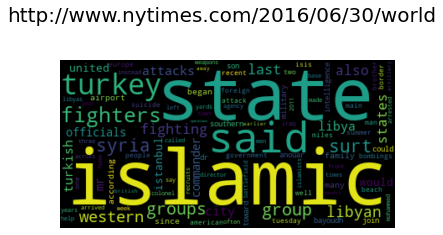

21/10/02 02:17:26 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


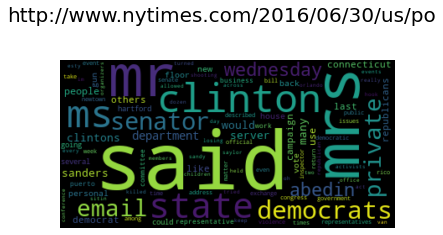

21/10/02 02:17:28 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


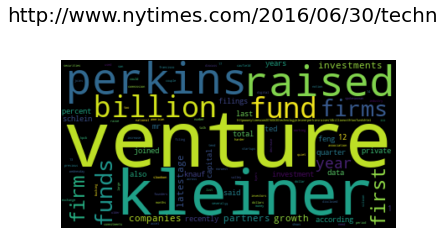

21/10/02 02:17:29 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


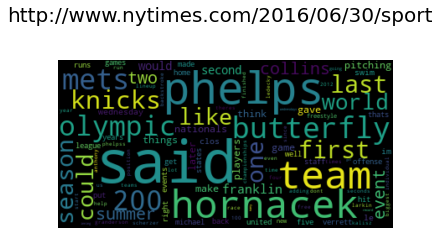

21/10/02 02:17:31 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyspark/python/lib/pyspark.zip/pyspark/shuffle.py:60: UserWarning: Please install psutil to have better support with spilling


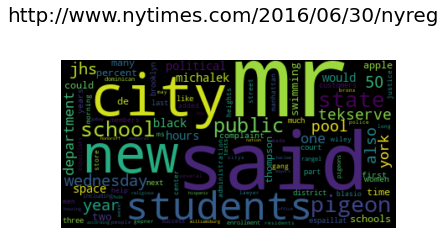

In [7]:
# create Spark context with necessary configuration
sc = SparkContext("local","PySpark Word Count Exmaple")

# read data from text file and split each line into words and groupby ing with the help of artical start string
nytarticals=sc.wholeTextFiles("/Users/venkatavarunnelakuditi/Desktop/input.txt").flatMap(lambda lin: lin[1].split("URL: ")).filter(lambda x: x is not '').groupBy(lambda w: w[0:39])


# read data from text file and split each line into words
nyt = nytarticals.map(lambda x : (x[0],list(x[1])))
nyt=nyt.collect()
nyt=sorted(nyt, key = lambda nyt: nyt[1],reverse=True)[:5]
wordFrequency=dict()
for x in nyt:
    wordFrequency[x[0]]=x[1]
sc.stop()
#flatMap(lambda line: line.split(" ")).map(lambda x: x.strip()).map(lambda x: charRemoveFromString(x)).map(lambda x:x.lower()).filter(lambda x: x not in stopWords)

for k,y in wordFrequency.items():
    wordCloud(k,y)